# Lecture 3 In-Class Python Practice

In [1]:
%matplotlib inline 
# import necessary libraries and specify that graphs should be plotted inline
import numpy as np
import pandas as pd
import sklearn
import mglearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Advanced Regression


In [2]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)

# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Polynomial Regression



In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures()
lreg = LinearRegression()
#define a list of parameters
param_poly = {'polynomialfeatures__degree':range(1,5)}

#apply polynomial regression in pipeline
pipe_poly = make_pipeline(PolynomialFeatures(), LinearRegression())
grid_poly = GridSearchCV(pipe_poly, param_poly,cv=5, n_jobs=-1, return_train_score = True)

# GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, cv=’warn’, return_train_score=’warn’)
#      estimator : estimator object.
#      param_grid : dict or list of dictionaries
#      scoring :If None, the estimator’s default scorer (if available) is used
#      n_jobs: Number of jobs to run in parallel
#      cv : Determines the cross-validation splitting strategy.
#      return_train_score : If False, the cv_results_ attribute will not include training scores.


grid_poly.fit(X_train, y_train)


#find best parameters
print('Best parameters: ', grid_poly.best_params_)


print('train score: ', grid_poly.score(X_train, y_train))
print('test score: ', grid_poly.score(X_test, y_test))

print("training results", grid_poly.cv_results_['mean_train_score'])
print("testing results", grid_poly.cv_results_['mean_test_score'])

# print the coefficients
print('Poly features: ', grid_poly.best_estimator_.named_steps['polynomialfeatures'].n_output_features_)
print('Coefficients: ', grid_poly.best_estimator_.named_steps['linearregression'].coef_)

Best parameters:  {'polynomialfeatures__degree': 4}
train score:  0.7366477110211134
test score:  0.7475874000113643
training results [0.66957342 0.67557511 0.70909723 0.73851526]
testing results [0.60020021 0.60076585 0.61255923 0.64807278]
Poly features:  5
Coefficients:  [ 0.          0.58704946 -0.18335282 -0.03395163  0.02642799]


In [4]:
# OUTPUT of GridSearchCV:
#      cv_results_
#      best_estimator_
#      best_score_
#      best_params_


grid_poly.cv_results_
#grid_poly.best_estimator_


{'mean_fit_time': array([0.00100279, 0.00110312, 0.00100265, 0.00090241]),
 'std_fit_time': array([3.69356475e-07, 3.75132717e-04, 3.23406696e-07, 3.75247455e-04]),
 'mean_score_time': array([0.0005013 , 0.00190496, 0.00060158, 0.00070171]),
 'std_score_time': array([1.16800773e-07, 2.80737877e-03, 2.00724623e-04, 2.45729479e-04]),
 'param_polynomialfeatures__degree': masked_array(data=[1, 2, 3, 4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'polynomialfeatures__degree': 1},
  {'polynomialfeatures__degree': 2},
  {'polynomialfeatures__degree': 3},
  {'polynomialfeatures__degree': 4}],
 'split0_test_score': array([0.84554192, 0.83230337, 0.86397203, 0.89628135]),
 'split1_test_score': array([0.58142366, 0.56509348, 0.5188232 , 0.5557927 ]),
 'split2_test_score': array([0.69549465, 0.70830397, 0.76775823, 0.76258251]),
 'split3_test_score': array([0.31079715, 0.3214205 , 0.24418549, 0.36828739]),
 'split4_test_score':

In [5]:
#predictions using polynomial regression
y_poly_train_predict = grid_poly.predict(X_train)
y_poly_predict = grid_poly.predict(X_test)

#MSE and MAE
from sklearn.metrics.scorer import mean_squared_error as mse
from sklearn.metrics.scorer import mean_absolute_error as mae

print('Train MSE score', mse(y_poly_train_predict,y_train))
print('Test MSE score',mse(y_poly_predict,y_test) )

print('Train MAE score',mae(y_poly_train_predict,y_train))
print('Test MAE score', mae(y_poly_predict,y_test))

Train MSE score 0.20428901086840767
Test MSE score 0.292456453305418
Train MAE score 0.36374762075965605
Test MAE score 0.4248567100647222


### Ridge Regression

In [6]:
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [7]:
ridge = Ridge()

#define a list of parameters
param_ridge = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100] }

grid_ridge = GridSearchCV(ridge, param_ridge, cv=5, return_train_score = True)
grid_ridge.fit(X_train, y_train)


print('train score: ', grid_ridge.score(X_train, y_train))
print('test score: ', grid_ridge.score(X_test, y_test))

#find best parameters
print('best parameters:',grid_ridge.best_params_)
print('Best cross-validation score:', grid_ridge.best_score_)

train score:  0.9282273685001986
test score:  0.7722067936479653
best parameters: {'alpha': 0.1}
Best cross-validation score: 0.8482741329711134


### Lasso

In [8]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [9]:
lasso = Lasso()

#define a list of parameters
param_lasso = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10] }

grid_lasso = GridSearchCV(lasso, param_lasso, cv=5, return_train_score = True)
grid_lasso.fit(X_train, y_train)


print('train score: ', grid_lasso.score(X_train, y_train))
print('test score: ', grid_lasso.score(X_test, y_test))

#find best parameters
print('Best parameters: ', grid_lasso.best_params_)
print('Best cross-validation score:', grid_lasso.best_score_)

train score:  0.9354593864534092
test score:  0.7547974360305004
Best parameters:  {'alpha': 0.001}
Best cross-validation score: 0.8246310563979493


## K-Nearest Neighbor

### Example I

Text(0, 0.5, 'Second feature')

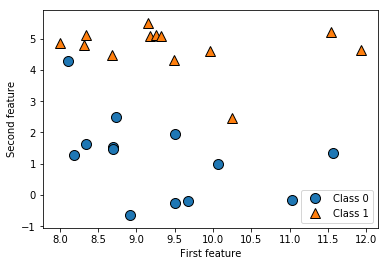

In [10]:
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"],loc=4);
plt.xlabel("First feature")
plt.ylabel('Second feature')


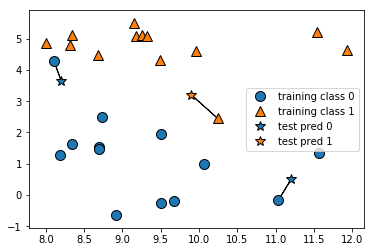

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)
#mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [12]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier is implementing the k-nearest neighbors vote

clf = KNeighborsClassifier(n_neighbors = 3)
# Apart from the number of neighbors you can also specify the distance metric to be used
# Wikipedia entry for k-nearest neighbors classifier: http://en.wikipedia.org/wiki/K-nearest_neighbor_algorithm
clf.fit(X_train, y_train)

print('The k nearest neighbors (and the corresponding distances) to user [1, 1] are:', clf.kneighbors([[1., 1.]]))

print("Test set predictions:", clf.predict(X_test))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

The k nearest neighbors (and the corresponding distances) to user [1, 1] are: (array([[7.70478347, 7.71204544, 7.82959548]]), array([[18, 14, 10]], dtype=int64))
Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


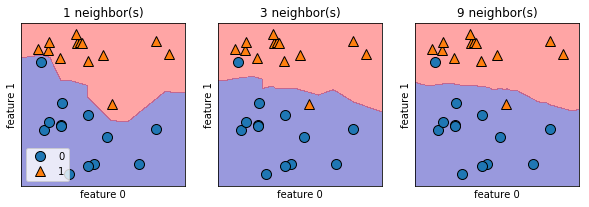

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3));

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4);
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax);
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

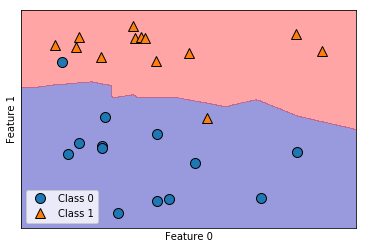

In [14]:
numN = 3
clf = KNeighborsClassifier(n_neighbors=numN).fit(X, y)
mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, alpha=.4);
mglearn.discrete_scatter(X[:, 0], X[:, 1], y);
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1"],loc = 3)

### Example II

In [15]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.datasets import load_iris

# load the dataset: load_iris() loads and returns the iris dataset
iris = load_iris()
# load_iris() returns a dictionary-like object. The interesting attributes are:
# ‘data’, the data to learn,
# ‘target’, the classification labels,
# ‘target_names’, the meaning of the labels,
# ‘feature_names’, the meaning of the features, and
# ‘DESCR’, the full description of the dataset.
# Wikipedia entry for this data set: https://en.wikipedia.org/wiki/Iris_flower_data_set

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [16]:
## Explore the data set
n_samples, n_features = iris.data.shape
print(iris.keys())
print('The dimensions of the data set are', n_samples, 'by', n_features)
# It is made of 150 observations of irises, each described by 4 features: their sepal and petal length and width, as detailed in iris.DESCR.

#print(iris.data.shape)
#print(iris.target.shape)
print('The classes are:', iris.target_names)
print('The features in the data set are:', iris.feature_names)

# This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored
# in a 150x4 numpy.ndarray
# The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
The dimensions of the data set are 150 by 4
The classes are: ['setosa' 'versicolor' 'virginica']
The features in the data set are: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


([], <a list of 0 Text yticklabel objects>)

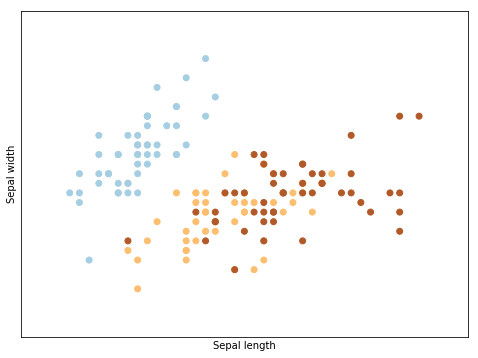

In [17]:
## Visualization of the data set
from mpl_toolkits.mplot3d import Axes3D

X = iris.data[:, :2] # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [18]:
# Train a k-NN model with k = 3
n_neighbors = 3

X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state = 0)
clf_train = KNeighborsClassifier(n_neighbors)
clf_train.fit(X_train, y_train)

print("Test set predictions:", clf_train.predict(X_test))
print("Test set accuracy: {:.2f}".format(clf_train.score(X_test, y_test)))

Test set predictions: [1 1 0 2 0 2 0 2 2 2 2 2 2 2 2 0 2 1 0 0 1 1 0 0 2 0 0 2 1 0 2 1 0 2 2 1 0
 1]
Test set accuracy: 0.71


In [19]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

# define a list of parameters
#param_knn = {'n_neighbors': [5, 10, 15, 20, 25, 30]}
param_knn = {'n_neighbors': range(5,25,3)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train, y_train)

print('train score: ', grid_knn.score(X_train, y_train))
print('test score: ', grid_knn.score(X_test, y_test))


train score:  0.8214285714285714
test score:  0.8157894736842105


In [20]:
grid_knn.best_params_

{'n_neighbors': 20}

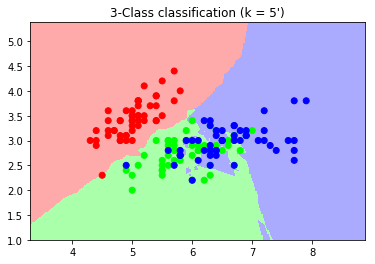

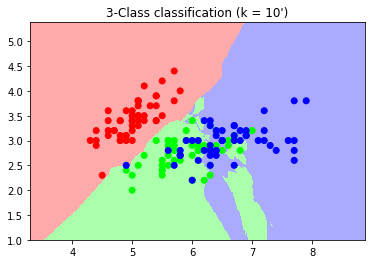

In [21]:
## Visualization of the decision boundaries

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

n_neighbors = 15
for n_neighbors in [5,10]:
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, Y) 

    # Plot the decision boundary. 
    # For that, we will assign a color to each point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i')"%n_neighbors)

plt.show()

